## Example of Jupyter/Ginga widget

This is an example of creating a Jupyter data viewer widget using a Jupyter image
widget and the Ginga viewer toolkit.

In [1]:
# create a Jupyter image that will be our display surface
# format can be 'jpeg' or 'png'; specify width and height to set viewer size
# PNG will be a little clearer, especially with overlaid graphics, but
# JPEG is faster to update
import ipywidgets as widgets
jup_img = widgets.Image(format='jpeg', width=500, height=500)

In [2]:
# Boilerplate to create a Ginga viewer connected to this widget
# this could be simplified, or hidden behind a class or convenience 
# method
from ginga.misc.log import get_logger
logger = get_logger("my viewer", log_stderr=True, level=10)

from ginga.web.jupyterw.ImageViewJpw import EnhancedCanvasView
v1 = EnhancedCanvasView(logger=logger)
v1.set_widget(jup_img)

# enable all possible keyboard and pointer operations
bd = v1.get_bindings()
bd.enable_all(True)

2017-10-04 11:18:18,168 | D | ImageView.py:379 (set_window_size) | widget resized to 500x500
2017-10-04 11:18:18,170 | D | ImageView.py:1563 (_calc_bg_dimensions) | approx area covered is 0x0 to 251x251
2017-10-04 11:18:18,172 | D | ImageView.py:1634 (apply_transforms) | reshape time 0.000 sec
2017-10-04 11:18:18,173 | D | ImageView.py:1653 (apply_transforms) | rotate time 0.001 sec, total reshape 0.001 sec
2017-10-04 11:18:18,173 | D | ImageView.py:1662 (apply_transforms) | ctr=250,250 off=363,363 dst=-113,-114 cutout=727x727
2017-10-04 11:18:18,174 | D | ImageView.py:1666 (apply_transforms) | win=500,500 coverage=614,613
2017-10-04 11:18:18,176 | D | ImageView.py:1516 (get_rgb_object) | times: total=0.0062
2017-10-04 11:18:18,176 | D | ImageViewPil.py:42 (render_image) | redraw surface
2017-10-04 11:18:18,194 | D | ImageView.py:1315 (check_cursor_location) | cursor location changed -249.0000,251.0000 => -249.0000,251.0000
2017-10-04 11:18:18,220 | D | ImageView.py:1260 (redraw_now) |

In [3]:

coordinates = widgets.HTML('<h3>Click an image to see the click coordinates here</h3>')

def mouse_move(viewer, button, data_x, data_y, w):
    image = viewer.get_image()
    if image is not None:
        ra, dec = image.pixtoradec(data_x, data_y)
        w.value = "cursor at %.3f, %.3f" % (ra, dec)

v1.add_callback('motion', mouse_move, coordinates)
widgets.VBox([jup_img, coordinates])


VBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01\xf4\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xc4\x00\x1f\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x11\x00\x02\x01\x02\x04\x04\x03\x04\x07\x05\x04\x04\x00\x01\x02w\x00\x01\x02\x03\x11\x04\x05!1\x06\x12AQ\x07aq\x13"2\x81\x08\x14B\x91\xa1\xb1\xc1\t#3R\xf0\x15br\xd1\n\x16$4\xe1%\xf1\x17\x18\x19\x1a&\'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x82\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\xf9R\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x02\x8a(\xa0\x

In [4]:
# Load a FITS file.  You should see the embedded image update.
v1.load_fits("/home/eric/testdata/SPCAM/SUPA01118766.fits")

2017-10-04 11:18:19,720 | D | io_fits.py:181 (open_file) | Loading file '/home/eric/testdata/SPCAM/SUPA01118766.fits' ...
2017-10-04 11:18:19,746 | D | io_fits.py:301 (get_hdu) | HDU index looks like: ('PRIMARY', 1)
2017-10-04 11:18:19,778 | D | wcs_astropy.py:68 (load_header) | Reconstructing PyFITS header
2017-10-04 11:18:19,785 | D | wcs_astropy.py:71 (load_header) | Trying to make astropy-- wcs object
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2017-10-04 11:18:19,806 | D | wcs_astropy.py:73 (load_header) | made astropy wcs object
2017-10-04 11:18:19,807 | D | wcs_astropy.py:76 (load_header) | Coordinate system is: fk5
2017-10-04 11:18:19,809 | D | ImageView.py:839 (apply_profile_or_settings) | auto orient (False)
2017-10-04 11:18:19,809 | D | ImageView.py:851 (apply_profile_or_settings) | auto zoom (on)
2017-10-04 11:18:19,810 | D | ImageView.py:2223 (zoom_fit) | Window size is 500x500
2017-10-04 11:18:19,810 | D | ImageView.py:2428 (pan_cb) | pan set to 11

2017-10-04 10:30:40,997 | D | ImageView.py:1563 (_calc_bg_dimensions) | approx area covered is 0x0 to 3272x4272
2017-10-04 10:30:41,001 | D | AutoCuts.py:73 (cut_levels) | loval=148.00 hival=1299.31
2017-10-04 10:30:41,003 | D | image.py:459 (draw_image) | shape of index is (500, 266)
2017-10-04 10:30:41,011 | D | ImageView.py:1634 (apply_transforms) | reshape time 0.000 sec
2017-10-04 10:30:41,012 | D | ImageView.py:1653 (apply_transforms) | rotate time 0.001 sec, total reshape 0.001 sec
2017-10-04 10:30:41,012 | D | ImageView.py:1662 (apply_transforms) | ctr=250,250 off=363,363 dst=-113,-114 cutout=727x727
2017-10-04 10:30:41,013 | D | ImageView.py:1666 (apply_transforms) | win=500,500 coverage=614,613
2017-10-04 10:30:41,014 | D | ImageView.py:1516 (get_rgb_object) | times: total=0.0172
2017-10-04 10:30:41,014 | D | ImageViewPil.py:42 (render_image) | redraw surface
2017-10-04 10:30:41,103 | D | ImageView.py:1260 (redraw_now) | widget '<ginga.web.jupyterw.ImageViewJpw.EnhancedCanvas

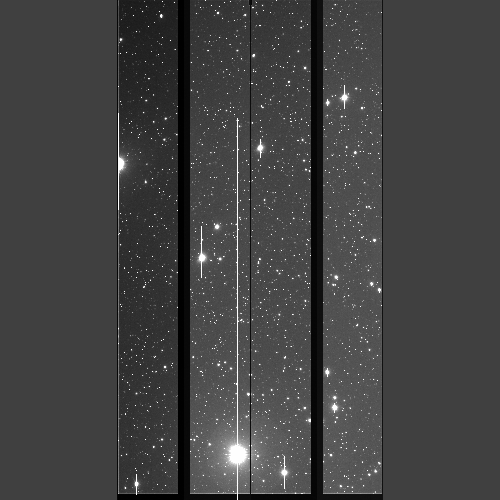

In [6]:
# grab a screenshot.
v1.show()

You can now do nearly everything that can be done with a regular "pg" type ginga web widget.
The big difference is that this Jupyter widget currently has no cursor, mouse or keyboard interaction.
You have to add your own widgets or use programmatic control for any interaction.

In [7]:
v1.cut_levels(0, 500)

2017-10-04 09:15:29,846 | D | AutoCuts.py:73 (cut_levels) | loval=0.00 hival=500.00
2017-10-04 09:15:29,848 | D | image.py:459 (draw_image) | shape of index is (500, 266)
2017-10-04 09:15:29,854 | D | ImageView.py:1634 (apply_transforms) | reshape time 0.000 sec
2017-10-04 09:15:29,855 | D | ImageView.py:1653 (apply_transforms) | rotate time 0.001 sec, total reshape 0.001 sec
2017-10-04 09:15:29,855 | D | ImageView.py:1662 (apply_transforms) | ctr=250,250 off=363,363 dst=-113,-114 cutout=727x727
2017-10-04 09:15:29,856 | D | ImageView.py:1666 (apply_transforms) | win=500,500 coverage=614,613
2017-10-04 09:15:29,857 | D | ImageView.py:1516 (get_rgb_object) | times: total=0.0112
2017-10-04 09:15:29,858 | D | ImageViewPil.py:42 (render_image) | redraw surface
2017-10-04 09:15:29,930 | D | ImageView.py:1260 (redraw_now) | widget '<ginga.web.jupyterw.ImageViewJpw.EnhancedCanvasView object at 0x7fe23891e7b8>' redraw (whence=1) delta=6.8164 elapsed=0.0844 sec


In [7]:
v1.auto_levels()

In [ ]:
v1.zoom_to(10)

In [ ]:
v1.set_pan(1420.4, 1210.3)